epoch [1/100], loss:0.2008
epoch [2/100], loss:0.1894
epoch [3/100], loss:0.1690
epoch [4/100], loss:0.1603
epoch [5/100], loss:0.1509
epoch [6/100], loss:0.1636
epoch [7/100], loss:0.1593
epoch [8/100], loss:0.1428
epoch [9/100], loss:0.1495
epoch [10/100], loss:0.1368
epoch [11/100], loss:0.1343
epoch [12/100], loss:0.1404
epoch [13/100], loss:0.1428
epoch [14/100], loss:0.1489
epoch [15/100], loss:0.1437
epoch [16/100], loss:0.1311
epoch [17/100], loss:0.1287
epoch [18/100], loss:0.1333
epoch [19/100], loss:0.1356
epoch [20/100], loss:0.1390
epoch [21/100], loss:0.1461
epoch [22/100], loss:0.1352
epoch [23/100], loss:0.1414
epoch [24/100], loss:0.1317
epoch [25/100], loss:0.1354
epoch [26/100], loss:0.1217
epoch [27/100], loss:0.1331
epoch [28/100], loss:0.1346
epoch [29/100], loss:0.1361
epoch [30/100], loss:0.1378
epoch [31/100], loss:0.1380
epoch [32/100], loss:0.1323
epoch [33/100], loss:0.1375
epoch [34/100], loss:0.1320
epoch [35/100], loss:0.1234
epoch [36/100], loss:0.1396
e

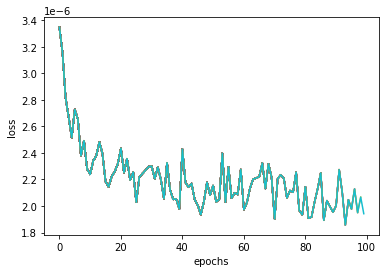

In [6]:
__author__ = 'SherlockLiao'

import os

import torch
import torchvision
from torch import nn
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision.datasets import MNIST
from torchvision.utils import save_image

import matplotlib.pyplot as plt

if not os.path.exists('./mlp_img'):
    os.mkdir('./mlp_img')


def to_img(x):
    x = 0.5 * (x + 1)
    x = x.clamp(0, 1)
    x = x.view(x.size(0), 1, 28, 28)
    return x


num_epochs = 100
batch_size = 128
learning_rate = 0.001#1e-3

img_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize([0.5], [0.5])
])

dataset = MNIST('./data', transform=img_transform, download=True)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)


class autoencoder(nn.Module):
    def __init__(self):
        super(autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(28 * 28, 128),
            nn.ReLU(True),
            nn.Linear(128, 64),
            nn.ReLU(True), nn.Linear(64, 12),
            nn.ReLU(True), nn.Linear(12, 3))
        self.decoder = nn.Sequential(
            nn.Linear(3, 12),
            nn.ReLU(True),
            nn.Linear(12, 64),
            nn.ReLU(True),
            nn.Linear(64, 128),
            nn.ReLU(True), nn.Linear(128, 28 * 28),
            nn.Tanh())

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


# device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
# model = autoencoder().to(device)
model = autoencoder()

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(
    model.parameters(), lr=learning_rate, weight_decay=1e-5)

loss_history = []
for epoch in range(num_epochs):
    for data in dataloader:
        img, _ = data
        img = img.view(img.size(0), -1)
        img = Variable(img)#.cuda()
        # ===================forward=====================
        output = model(img)
        loss = criterion(output, img)
        # ===================backward====================
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    # ===================log========================
    print('epoch [{}/{}], loss:{:.4f}'
          .format(epoch + 1, num_epochs, loss.item())) #loss.data[0]
    if epoch % 10 == 0:
        pic = to_img(output.cpu().data)
        save_image(pic, './mlp_img/image_{}.png'.format(epoch))

    #Plot history
    loss_history.append(loss.item())
    plt.plot(loss_history)
    plt.xlabel('epochs')
    plt.ylabel('loss')

torch.save(model.state_dict(), './sim_autoencoder.pth')


In [ ]:
print(type(dataset))
print(dataset[0][0].size())

In [9]:
print(type(dataset))
print(dataset)
dataset.size()

<class 'torchvision.datasets.mnist.MNIST'>
Dataset MNIST
    Number of datapoints: 60000
    Root location: ./data
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=[0.5], std=[0.5])
           )


AttributeError: 'MNIST' object has no attribute 'size'